In [1]:
import pandas as pd


METRIC_SET_MAPPING = {
    "none": "NONE",
    "all-non-null-numeric": "ALL",
    "pydriller": "PyD",
    "product": "PD",
    "process": "PR",
    "javametrics-numeric": "JM",
    "javametrics2": "JM2",
    "javametrics2-process": "JM2R",
    "javametrics2-product": "JM2D",
    "pmd": "PMD",
    "minimal-good": "MG",
    "best-mcc": "BC",
    "best-precision": "BP"
}

MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB",
    "unscaled-XGB": "XGB",
    "unscaled-LGBM": "LBGM",
    "unscaled-catboost-05": "CB",
}


partial_results = [
    "../../data/experiment4-final/final_defects_stats.csv"
]

results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in partial_results])

description = results.groupby(["model_type", "metric_set", "smell_models"]).describe()

description = results.filter(["model_type", "metric_set", "smell_models", "real_mcc", "real_precision"]).groupby(["model_type", "smell_models", "metric_set"]).describe()
description

real_mcc                      \
                                                 count      mean       std   
model_type            smell_models metric_set                                
unscaled-randomforest False        1A             50.0  0.305220  0.006533   
                                   1B             50.0  0.172263  0.005824   
                                   1C             50.0  0.196140  0.007194   
                                   1D             50.0  0.221735  0.006681   
                                   1E             50.0  0.214122  0.006936   
                                   1F             50.0 -0.015988  0.005883   
                                   1G             50.0  0.031905  0.006368   
                                   1H             50.0  0.209872  0.007364   
                                   1I             50.0  0.239834  0.007632   
                                   1J             50.0  0.268198  0.008126   
                                   1K             50.0  0.222967  0.006022   
                                   1L             50.0  0.350017  0.005150   
                                   1M            100.0  0.064306  0.006422   
                                   1P             50.0  0.052829  0.006903   
                                   2A             50.0  0.373614  0.006043   
                                   3A             50.0  0.354832  0.007314   
                                   3B             50.0  0.367659  0.006962   
                                   5A             50.0  0.397778  0.006883   
                                   5B             50.0  0.430481  0.006192   
                                   5C             50.0  0.432060  0.006241   
                                   6A             50.0  0.448142  0.005714   
                                   6B             50.0  0.449482  0.005671   
                                   7A             50.0  0.462801  0.005815   
                                   7B             50.0  0.445963  0.006148   
                                   7C             50.0  0.463047  0.006024   
                                   7D             50.0  0.461773  0.006059   
                                   7E             50.0  0.461872  0.005582   
                                   8A             50.0  0.462931  0.005945   
                                   8B             50.0  0.456586  0.005939   
                                   9A             50.0  0.465143  0.005858   
                                   9B             50.0  0.473769  0.006577   

                                                                             \
                                                    min       25%       50%   
model_type            smell_models metric_set                                 
unscaled-randomforest False        1A          0.289070  0.300736  0.305733   
                                   1B          0.159172  0.169113  0.172828   
                                   1C          0.184018  0.190950  0.195492   
                                   1D          0.209333  0.215858  0.221040   
                                   1E          0.188129  0.210606  0.214926   
                                   1F         -0.027030 -0.020623 -0.015863   
                                   1G          0.015265  0.027158  0.032093   
                                   1H          0.189248  0.204341  0.211357   
                                   1I          0.216853  0.235646  0.239940   
                                   1J          0.247130  0.262520  0.268298   
                                   1K          0.204412  0.219254  0.223711   
                                   1L          0.336875  0.347647  0.350504   
                                   1M          0.049590  0.060055  0.065548   
                                   1P          0.038379  0.049503  0.052394   
                                   2A          0.3

In [2]:
series = description.filter([("real_mcc", "50%"), ("real_precision", "50%")]).reset_index()
series["MCC (no smells)"] = series[("real_mcc", "50%")]
series["Precision (no smells)"] = series[("real_precision", "50%")]
series["Metric set"] = series["metric_set"]
series = series.drop(columns=[("real_mcc", "50%"), ("real_precision", "50%")])
# series["metric_set"] = series["metric_set"].map(METRIC_SET_MAPPING)
# series["model_type"] = series["model_type"].map(MODEL_NAME_MAPPING)

# incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
# excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])

# final_series = incl_smells.merge(excl_smells, on=("model_type", "metric_set"), suffixes=(" (smells)", " (no smells)"))

final_series = series[["Metric set", "MCC (no smells)", "Precision (no smells)"]]

final_series = final_series.sort_values(by=['MCC (no smells)'], ascending=False)

final_series = final_series.reset_index(drop=True)
final_series.index += 1
final_series.style.to_latex(
    buf="performance-metrics-minimal.tex",
    caption="Prediction performance measures for multi-metric scenario",
    label="Appendix:DataTableBasic",
    environment = "longtable"
)

final_series

,Metric set,MCC (no smells),Precision (no smells)
,,,
1,9B,0.473560,0.704397
2,9A,0.465227,0.675921
3,7A,0.463144,0.672728
4,8A,0.463112,0.696634
5,7C,0.462994,0.693201
6,7E,0.461220,0.693218
7,7D,0.461071,0.693241
8,8B,0.455922,0.667771
9,6B,0.449006,0.681144


<AxesSubplot: xlabel='Metric set', ylabel='MCC'>

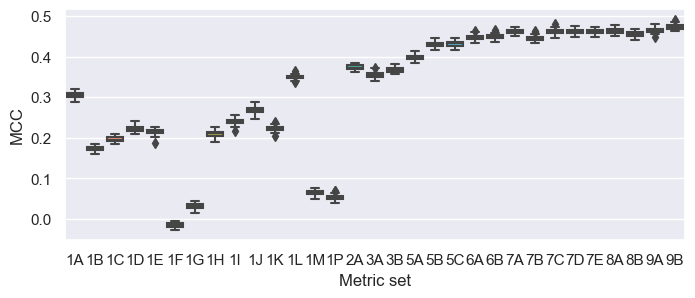

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize': (8.0, 3.0)})

metricset_data = results.filter(["real_mcc", "real_precision", "metric_set"])
# metricset_data["metric_set"] = metricset_data["metric_set"].map(METRIC_SET_MAPPING)

mcc_set = sns.boxplot(
    metricset_data, y="real_mcc", x="metric_set"
)

mcc_set.set(xlabel="Metric set", ylabel="MCC")

mcc_set.get_figure().savefig("minimal_mcc_set.png")
mcc_set

In [4]:
metricset_summary = metricset_data.groupby("metric_set").describe()

metricset_summary.style.to_latex("metrics-minimal.tex")

metricset_summary

real_mcc                                                    \
              count      mean       std       min       25%       50%   
metric_set                                                              
1A             50.0  0.305220  0.006533  0.289070  0.300736  0.305733   
1B             50.0  0.172263  0.005824  0.159172  0.169113  0.172828   
1C             50.0  0.196140  0.007194  0.184018  0.190950  0.195492   
1D             50.0  0.221735  0.006681  0.209333  0.215858  0.221040   
1E             50.0  0.214122  0.006936  0.188129  0.210606  0.214926   
1F             50.0 -0.015988  0.005883 -0.027030 -0.020623 -0.015863   
1G             50.0  0.031905  0.006368  0.015265  0.027158  0.032093   
1H             50.0  0.209872  0.007364  0.189248  0.204341  0.211357   
1I             50.0  0.239834  0.007632  0.216853  0.235646  0.239940   
1J             50.0  0.268198  0.008126  0.247130  0.262520  0.268298   
1K             50.0  0.222967  0.006022  0.204412  0.219254  0.223711   
1L             50.0  0.350017  0.005150  0.336875  0.347647  0.350504   
1M            100.0  0.064306  0.006422  0.049590  0.060055  0.065548   
1P             50.0  0.052829  0.006903  0.038379  0.049503  0.052394   
2A             50.0  0.373614  0.006043  0.362561  0.369763  0.372773   
3A             50.0  0.354832  0.007314  0.339911  0.350750  0.353786   
3B             50.0  0.367659  0.006962  0.356374  0.362590  0.366905   
5A             50.0  0.397778  0.006883  0.384666  0.393178  0.397069   
5B             50.0  0.430481  0.006192  0.416841  0.426466  0.430772   
5C             50.0  0.432060  0.006241  0.415826  0.426592  0.432788   
6A             50.0  0.448142  0.005714  0.433905  0.444265  0.448176   
6B             50.0  0.449482  0.005671  0.437370  0.446253  0.449006   
7A             50.0  0.462801  0.005815  0.451763  0.458385  0.463144   
7B             50.0  0.445963  0.006148  0.432498  0.441453  0.446229   
7C             50.0  0.463047  0.006024  0.447110  0.458420  0.462994   
7D             50.0  0.461773  0.006059  0.449483  0.458186  0.461071   
7E             50.0  0.461872  0.005582  0.448558  0.458692  0.461220   
8A             50.0  0.462931  0.005945  0.450375  0.458994  0.463112   
8B             50.0  0.456586  0.005939  0.442244  0.452031  0.455922   
9A             50.0  0.465143  0.005858  0.449392  0.461553  0.465227   
9B             50.0  0.473769  0.006577  0.462189  0.468825  0.473560   

                               real_precision                                \
                 75%       max          count      mean       std       min   
metric_set                                                                    
1A          0.309315  0.320926           50.0  0.618815  0.007695  0.604160   
1B          0.176160  0.184412           50.0  0.534823  0.008183  0.520288   
1C          0.202564  0.209698           50.0  0.461759  0.006200  0.450781   
1D          0.227126  0.241418           50.0  0.542097  0.008693  0.523458   
1E          0.218447  0.225501           50.0  0.531129  0.007490  0.504636   
1F         -0.010952 -0.005295           50.0  0.261304  0.013380  0.234957   
1G          0.036581  0.043151           50.0  0.339168  0.008325  0.317944   
1H          0.214791  0.226085           50.0  0.572293  0.009687  0.540945   
1I          0.244256  0.256545           50.0  0.591367  0.011730  0.565428   
1J          0.273036  0.287642           50.0  0.580121  0.008643  0.560049   
1K          0.226865  0.240001           50.0  0.897508  0.012554  0.871269   
1L          0.352751  0.365178           50.0  0.453664  0.003024  0.446090   
1M          0.068871  0.077009          100.0  0.819471  0.062276  0.662651   
1P          0.056947  0.069510           50.0  0.607165  0.042778  0.513889   
2A          0.378378  0.384986           50.0  0.626768  0.006645  0.614219   
3A          0.359291  0.372552           50.0  0.542757  0.005306  0.528905   
3B          0.371577  0.382

<AxesSubplot: xlabel='Metric set', ylabel='Precision'>

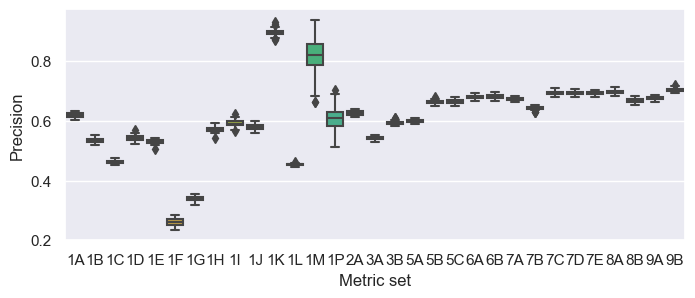

In [5]:
precision_set = sns.boxplot(
    metricset_data, y="real_precision", x="metric_set"
)


precision_set.set(xlabel="Metric set", ylabel="Precision")
precision_set.get_figure().savefig("minimal_precision_set.png")
precision_set

<AxesSubplot: xlabel='ML model', ylabel='MCC'>

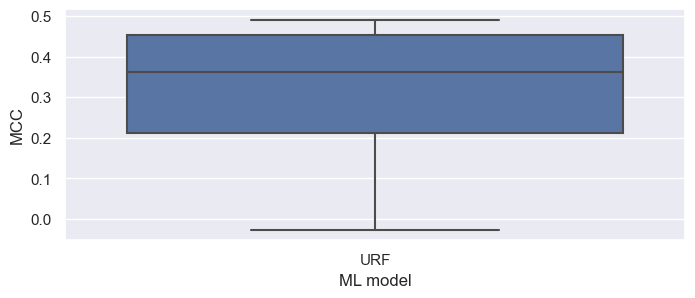

In [6]:

modeltype_data = results.filter(["real_mcc", "real_precision", "model_type"])
modeltype_data["model_type"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

model_mcc = sns.boxplot(
    modeltype_data, y="real_mcc", x="model_type"
)

model_mcc.set(xlabel="ML model", ylabel="MCC")
model_mcc.get_figure().savefig("minimal_mcc_model.png")
model_mcc

<AxesSubplot: xlabel='ML model', ylabel='Precision'>

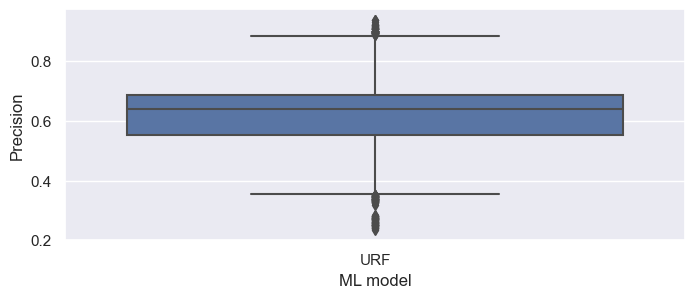

In [7]:
model_precision = sns.boxplot(
    modeltype_data, y="real_precision", x="model_type"
)

model_precision.set(xlabel="ML model", ylabel="Precision")
model_precision.get_figure().savefig("minimal_precision_model.png")
model_precision

In [8]:
modelset_summary = modeltype_data.groupby("model_type").describe()

modelset_summary.style.to_latex("models-minimal.tex")

modelset_summary


real_mcc                                                   \
              count      mean       std      min       25%       50%   
model_type                                                             
URF          1600.0  0.312677  0.151964 -0.02703  0.212179  0.361453   

                               real_precision                                \
                 75%       max          count      mean       std       min   
model_type                                                                    
URF         0.452695  0.491071         1600.0  0.619522  0.126337  0.234957   

                                                    
                 25%       50%       75%       max  
model_type                                          
URF         0.553087  0.639498  0.686169  0.938776

<AxesSubplot: xlabel='Include smell models', ylabel='MCC'>

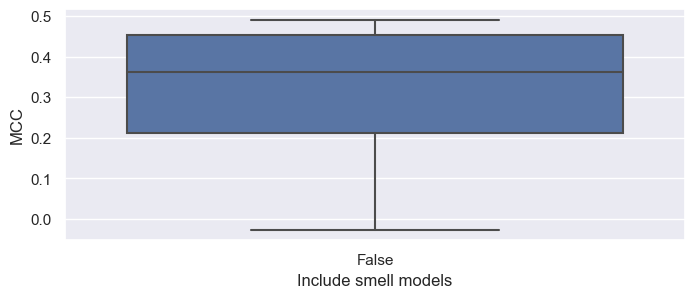

In [9]:
smell_data = results.filter(["real_mcc", "real_precision", "smell_models"])

smells_mcc = sns.boxplot(
    smell_data, y="real_mcc", x="smell_models"
)

smells_mcc.set(xlabel="Include smell models", ylabel="MCC")
smells_mcc.get_figure().savefig("minimal_mcc_smells.png")
smells_mcc

<AxesSubplot: xlabel='Include smell models', ylabel='Precision'>

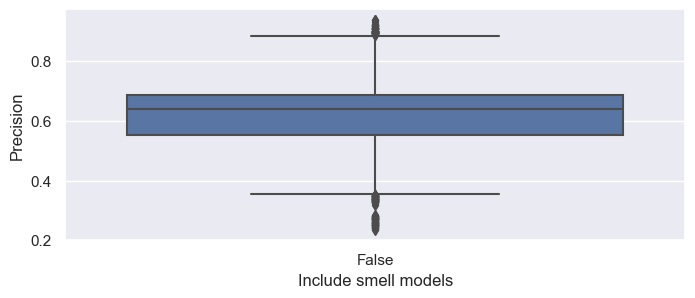

In [10]:
smells_precision = sns.boxplot(
    smell_data, y="real_precision", x="smell_models"
)

smells_precision.set(xlabel="Include smell models", ylabel="Precision")
smells_precision.get_figure().savefig("minimal_precision_smells.png")
smells_precision

In [11]:
from effect_size_analysis.cliff_delta import cliff_delta


def calculate_cliff_deltas(all_results, column):
    descriptors = all_results[column].unique()
    cds = {}
    descriptors_1 = []
    descriptors_2 = []
    cd_mcc = []
    cd_mcc_min = []
    cd_mcc_max = []
    cd_prec = []
    cd_prec_min = []
    cd_prec_max = []

    descriptors_count = len(descriptors)
    for i in range(descriptors_count):
        item_1 = results[results[column] == descriptors[i]]
        for j in range(i + 1, descriptors_count):
            item_2 = results[results[column] == descriptors[j]]
            descriptors_1.append(descriptors[i])
            descriptors_2.append(descriptors[j])
            cd_mcc_curr = cliff_delta(item_1["real_mcc"], item_2["real_mcc"], alpha=0.05, accurate_ci=True)
            cd_mcc.append(cd_mcc_curr[0])
            cd_mcc_min.append(cd_mcc_curr[1][0])
            cd_mcc_max.append(cd_mcc_curr[1][1])
            cd_prec_curr = cliff_delta(item_1["real_precision"], item_2["real_precision"], alpha=0.05, accurate_ci=True)
            cd_prec.append(cd_prec_curr[0])
            cd_prec_min.append(cd_prec_curr[1][0])
            cd_prec_max.append(cd_prec_curr[1][1])
    return pd.DataFrame(
        {"descriptor_1": descriptors_1, "descriptor_2": descriptors_2, "CD MCC min": cd_mcc_min, "CD MCC": cd_mcc,
         "CD MCC max": cd_mcc_max, "CD precision min": cd_prec_min, "CD precision": cd_prec,
         "CD precision max": cd_prec_max})


In [12]:

calculate_cliff_deltas(results, "model_type")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max


In [13]:

calculate_cliff_deltas(results, "metric_set")

L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:94: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 - ci_size) / denom_corretion,
L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:95: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 + ci_size) / denom_corretion,


,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,1A,1B,NaN,1.0000,NaN,NaN,1.0000,NaN
1,1A,1C,NaN,1.0000,NaN,NaN,1.0000,NaN
2,1A,1D,NaN,1.0000,NaN,NaN,1.0000,NaN
3,1A,1E,NaN,1.0000,NaN,NaN,1.0000,NaN
4,1A,1F,NaN,1.0000,NaN,NaN,1.0000,NaN
...,...,...,...,...,...,...,...,...
460,8A,9A,-0.417903,-0.2120,0.014618,0.979583,0.9952,0.998878
461,8A,9B,-0.875800,-0.7808,-0.627563,-0.757482,-0.6200,-0.429864
462,8B,9A,-0.814380,-0.6952,-0.519754,-0.779215,-0.6472,-0.460198
463,8B,9B,-0.985040,-0.9624,-0.907100,NaN,-1.0000,NaN


In [14]:

calculate_cliff_deltas(results, "smell_models")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
